In [99]:
import os
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
path = "./Predictions_3_files/"
mpl.axes.titlesize=14
mpl.axes.labelsize=14

In [100]:
overAllDict = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)
            
            for stuff in lines[1:]:


                for thing in stuff:
                    thingie = thing.split("\t") # split by tabs to get columns
                    if len(keys) != len(thingie):
                        print(sentID,thingie)
                    else:
                        _List = [int(thingie[0])]
                        _List.append(int(thingie[-4]))
                        _List.append(thingie[-3])
                        _List.append(int(thingie[-2]))
                        _List.append(thingie[-1])
                    
                        sentDicts.append(_List)
                        
                sentID += 1
            overAllDict[item][filName.split(".")[0]] = sentDicts

./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/L2S/poetry.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/L2S/Test.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
1001 ['']
./Predictions_3_files/yap/prose.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/yap/poetry.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/yap/Test.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
1001 ['']
./Predictions_3_files/DCST/poetry_final.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head

In [101]:
#precision
depDisttDictUnLab = defaultdict(dict)
depDisttDictLab = defaultdict(dict)
for item in overAllDict:
    for thing in overAllDict[item]:
        for stuff in overAllDict[item][thing]:
            #print(item+"_"+thing, stuff[1], stuff[3], stuff[1]-stuff[3])
            if stuff[1] == stuff[3]:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                if stuff[2] == stuff[4]:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1) 
                else:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                    
            else:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)

                try:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                except KeyError:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)

<Figure size 432x288 with 0 Axes>

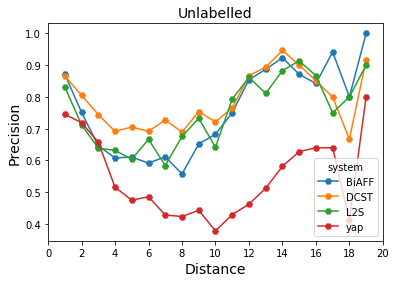

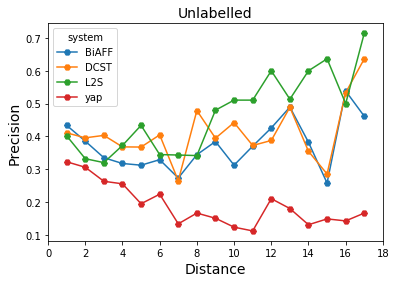

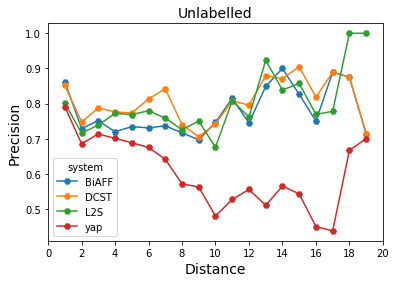

In [102]:
def plotter(item,cutoff,labOrNot="Unlabelled",evaln="Precision"): 
    plotPD = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= cutoff)  ][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore").fillna(0)
    ax = plotPD.plot(marker='H',title=labOrNot,xticks=(range(0,len(plotPD.index)+2,2)))
    ax.title.set_size(14)
    ax.set_ylabel(evaln,fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+evaln+".eps",dpi=600,bbox_inches="tight")
    
    

resList = list()
for item in depDisttDictUnLab:
    for stuff in depDisttDictUnLab[item]:
        thing = depDisttDictUnLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
item =  distPD["setting"].unique()
plotter('prose',19)
plotter('poetry',17)
plotter('Test',19)

<Figure size 432x288 with 0 Axes>

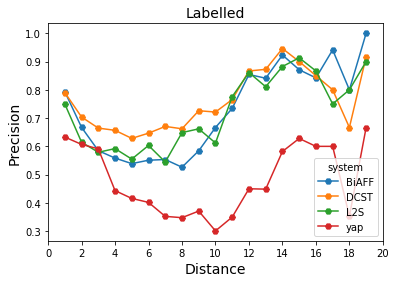

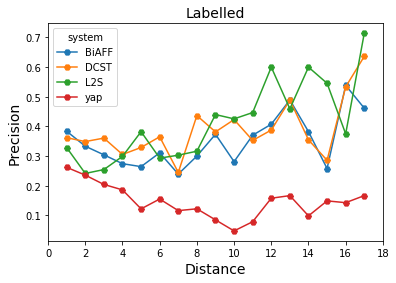

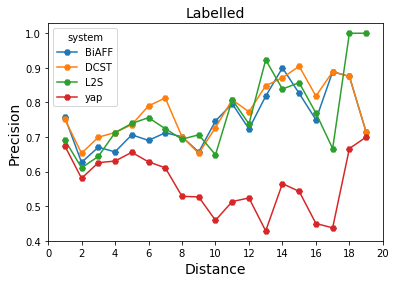

In [103]:
resList = list()
for item in depDisttDictLab:
    for stuff in depDisttDictLab[item]:
        thing = depDisttDictLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
item =  distPD["setting"].unique()
plotter('prose',19,labOrNot="Labelled")
plotter('poetry',17,labOrNot="Labelled")
plotter('Test',19,labOrNot="Labelled")

In [104]:
#recall
depDisttDictUnLab = defaultdict(dict)
depDisttDictLab = defaultdict(dict)
for item in overAllDict:
    for thing in overAllDict[item]:
        for stuff in overAllDict[item][thing]:
            #print(item+"_"+thing, stuff[1], stuff[3], stuff[1]-stuff[3])
            if stuff[1] == stuff[3]:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1)
                if stuff[2] == stuff[4]:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1) 
                else:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                    
            else:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)

                try:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                except KeyError:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)

<Figure size 432x288 with 0 Axes>

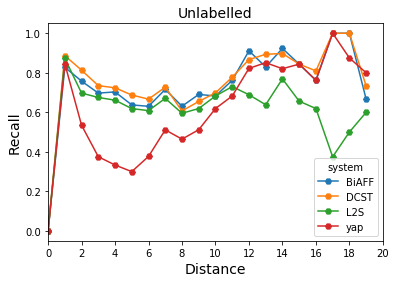

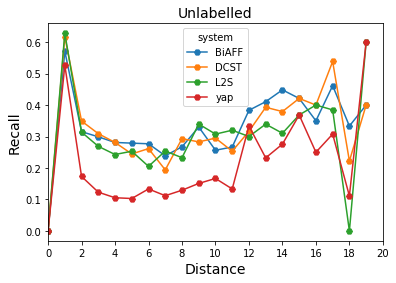

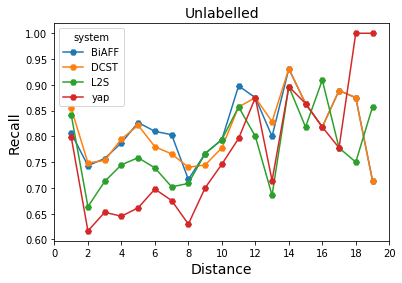

In [105]:
resList = list()
for item in depDisttDictUnLab:
    for stuff in depDisttDictUnLab[item]:
        thing = depDisttDictUnLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()

item =  distPD["setting"].unique()
plotter('prose',19,evaln="Recall")
plotter('poetry',19,evaln="Recall")
plotter('Test',19,evaln="Recall")

<Figure size 432x288 with 0 Axes>

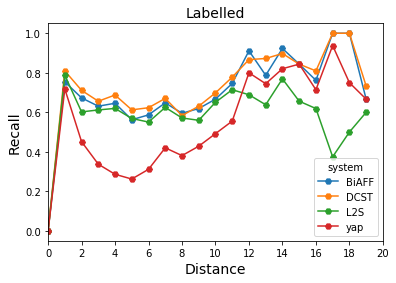

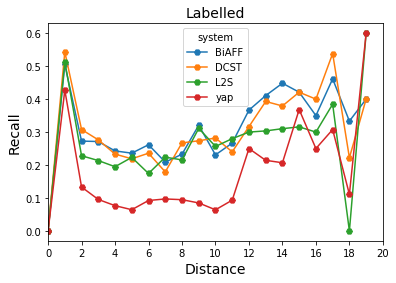

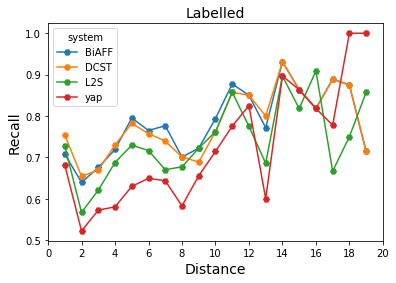

In [106]:
resList = list()
for item in depDisttDictLab:
    for stuff in depDisttDictLab[item]:
        thing = depDisttDictLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()

item =  distPD["setting"].unique()
plotter('prose',19,labOrNot="Labelled",evaln="Recall")
plotter('poetry',19,labOrNot="Labelled",evaln="Recall")
plotter('Test',19,labOrNot="Labelled",evaln="Recall")

In [107]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            rootDist = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                tempSent = [thing.split("\t") for thing in stuff]

                for thing in tempSent:
                    try:
                        _path = [int(thing[0])]
                        startNode = int(thing[0])
                        termNode = int(thing[0])
                        
                    except ValueError:
                        print(thing[0],thing)
                        
   
                    while termNode != 0:
                        try:
                            if termNode == int(tempSent[termNode - 1][-4]):
                                _path = list()
                                break
        
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break

                        if len(tempSent) < len(_path):
                            print(len(tempSent), len(_path), _path, tempSent[0])
                            _path = list()
                            break
                        try:
                            termNode = int(tempSent[termNode - 1][-4])
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break
                            
                        
                        
                        
                        _path.append(termNode)
                    if thing[-4] == thing[-2]:
                        _path.append(True)
                        if thing[-3] == thing[-1]:
                            _path.append(True)
                        else:
                            _path.append(False)

                    else:
                        _path.append(False)
                        _path.append(False)

                    rootDist.append(_path)
            rootDef[item][filName.split(".")[0]] = rootDist            


./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
11 12 [1, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [2, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [3, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [4, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [6, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [7, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axi

18 19 [14, 13, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18] ['1', 'vayasya', 'vayasya', 'voc. sg. m.', 'voc. sg. m.', 'case=voc|gender=m|nos=sg', '2', 'prawiyogi', '2', 'prawiyogi']
18 19 [15, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18] ['1', 'vayasya', 'vayasya', 'voc. sg. m.', 'voc. sg. m.', 'case=voc|gender=m|nos=sg', '2', 'prawiyogi', '2', 'prawiyogi']
18 19 [16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16] ['1', 'vayasya', 'vayasya', 'voc. sg. m.', 'voc. sg. m.', 'case=voc|gender=m|nos=sg', '2', 'prawiyogi', '2', 'prawiyogi']
18 19 [17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17] ['1', 'vayasya', 'vayasya', 'voc. sg. m.', 'voc. sg. m.', 'case=voc|gender=m|nos=sg', '2', 'prawiyogi', '2', 'prawiyogi']
18 19 [18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18] ['1', 'vayasya', 'vayasya', 'voc. sg. m.', 'voc. sg. m.', 'case=voc|gender=m|nos=sg', '2', 'prawi

15 13 3 [4, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 9 [5, 3, 1, 2, 6, 11, 12, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 5 [6, 11, 12, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 2 [8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 6 [9, 6, 11, 12, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 5 [10, 11, 12, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 4 [11, 12, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 3 [12, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
15 13 3 [13, 8, 15] ['1', 'AkarzatA', 'ppr. ac', 'AN_kfz', '2', 'prawiyogi', '2', 'prawiyogi']
11 12 [2, 7, 10, 11, 8, 2, 7, 10, 11, 8, 2, 7] ['1', 'Bavanti', 'pr. [1] ac. pl. 3', 'BU', '0', 'root'

13 14 [3, 9, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [4, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [5, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [6, 4, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [7, 4, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [8, 9, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [9, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [10, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [11, 9, 13, 1, 12, 13

In [108]:
totListUnLab = defaultdict(dict)
totListLab = defaultdict(dict)
for item in rootDef:
    for stuff in rootDef[item]:
        countr = 0
        for thing in rootDef[item][stuff]:
            if len(thing) >= 3:
                if thing[-2] == True:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                if thing[-1] == True:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                
                
            else:
                countr +=1
        print(item,stuff,countr, len(rootDef[item][stuff]))

L2S prose 150 3706
L2S poetry 144 3706
L2S Test 0 6895
yap prose 150 3706
yap poetry 144 3706
yap Test 0 6895
DCST poetry_final 144 3706
DCST prose_final 150 3706
DCST Test 0 6895
BiAFF poetry_final 144 3706
BiAFF prose_final 150 3706
BiAFF Test 0 6895


In [109]:
unDF = list()
for item in totListUnLab:
    for stuff in totListUnLab[item]:
        thing = totListUnLab[item][stuff]
        unDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

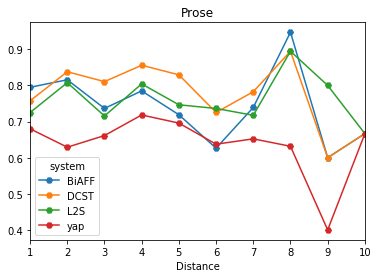

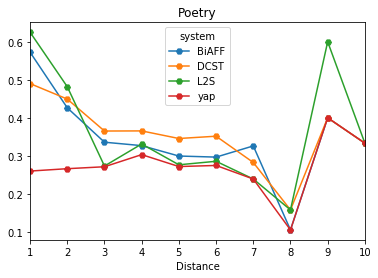

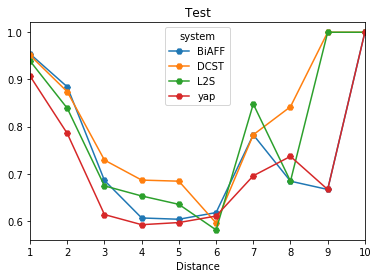

In [110]:
distPD = pd.DataFrame.from_records(unDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())

In [111]:
labDF = list()
for item in totListLab:
    for stuff in totListLab[item]:
        thing = totListLab[item][stuff]
        labDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

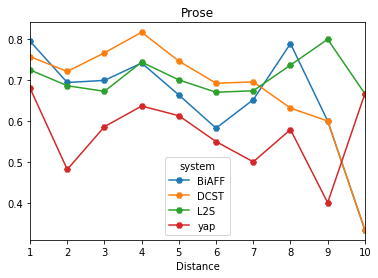

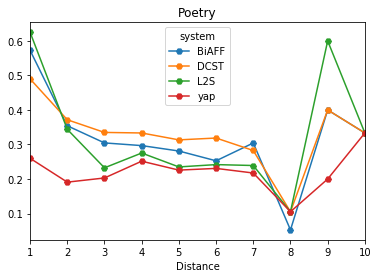

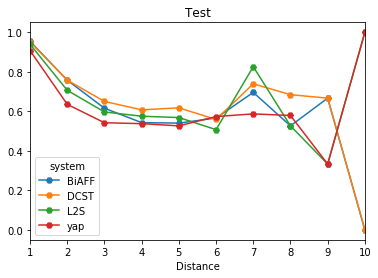

In [112]:
distPD = pd.DataFrame.from_records(labDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())

In [113]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            rootDist = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                tempSent = [thing.split("\t") for thing in stuff]

                for thing in tempSent:
                    try:
                        _path = [int(thing[0])]
                        startNode = int(thing[0])
                        termNode = int(thing[0])
                        
                    except ValueError:
                        print(thing[0],thing)
                        
   
                    while termNode != 0:
                        try:
                            if termNode == int(tempSent[termNode - 1][-2]):
                                _path = list()
                                break
        
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break

                        if len(tempSent) < len(_path):
                            print(len(tempSent), len(_path), _path, tempSent[0])
                            _path = list()
                            break
                        try:
                            termNode = int(tempSent[termNode - 1][-2])
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break
                            
                        
                        
                        
                        _path.append(termNode)
                    if thing[-4] == thing[-2]:
                        _path.append(True)
                        if thing[-3] == thing[-1]:
                            _path.append(True)
                        else:
                            _path.append(False)

                    else:
                        _path.append(False)
                        _path.append(False)

                    rootDist.append(_path)
            rootDef[item][filName.split(".")[0]] = rootDist            


./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/L2S/poetry.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/L2S/Test.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/yap/prose.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/yap/poetry.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/yap/Test.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/DCST/poetry_final.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Prediction

In [114]:
totListUnLab = defaultdict(dict)
totListLab = defaultdict(dict)
for item in rootDef:
    for stuff in rootDef[item]:
        countr = 0
        for thing in rootDef[item][stuff]:
            if len(thing) >= 3:
                if thing[-2] == True:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                if thing[-1] == True:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                
                
            else:
                countr +=1
        print(item,stuff,countr, len(rootDef[item][stuff]))

L2S prose 0 3706
L2S poetry 0 3706
L2S Test 0 6895
yap prose 0 3706
yap poetry 0 3706
yap Test 0 6895
DCST poetry_final 0 3706
DCST prose_final 0 3706
DCST Test 0 6895
BiAFF poetry_final 0 3706
BiAFF prose_final 0 3706
BiAFF Test 0 6895


<Figure size 432x288 with 0 Axes>

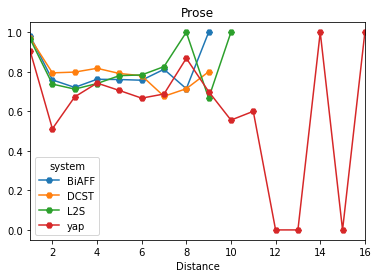

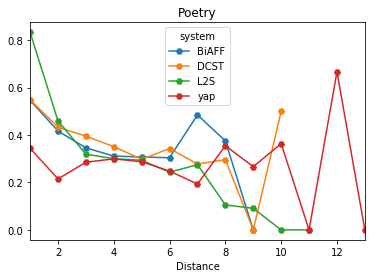

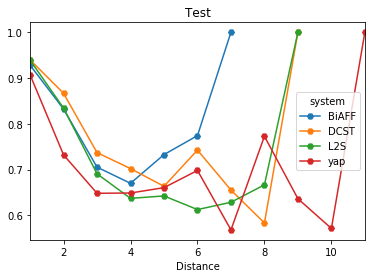

In [115]:
unDF = list()
for item in totListUnLab:
    for stuff in totListUnLab[item]:
        thing = totListUnLab[item][stuff]
        unDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])
distPD = pd.DataFrame.from_records(unDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())

<Figure size 432x288 with 0 Axes>

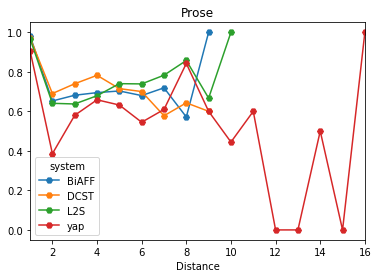

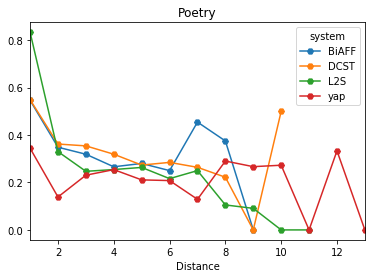

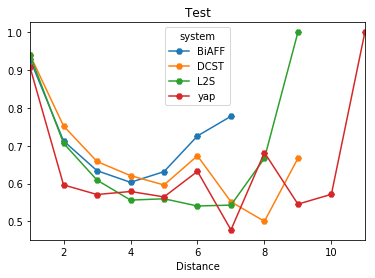

In [116]:
labDF = list()
for item in totListLab:
    for stuff in totListLab[item]:
        thing = totListLab[item][stuff]
        labDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])
distPD = pd.DataFrame.from_records(labDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())

In [117]:
        for (parentIdx, childIdx) in arc_list:
            # Ensure that childIdx < parentIdx
            if childIdx > parentIdx:
                temp = childIdx
                childIdx = parentIdx
                parentIdx = temp
            for k in range(childIdx + 1, parentIdx):
                for m in range(len(depgraph.nodes)):
                    if (m < childIdx) or (m > parentIdx):
                        if (k, m) in arc_list:
                            return False
                        if (m, k) in arc_list:
                            return False
        return True

SyntaxError: 'return' outside function (<ipython-input-117-f69c2fcb818a>, line 11)

In [ ]:
def parents(tempSent):
    rootDist = dict()
    for thing in tempSent:
        try:
            _path = [int(thing[0])]
            startNode = int(thing[0])
            termNode = int(thing[0])

        except ValueError:
            print(thing[0],thing)


        while termNode != 0:
            try:
                if termNode == int(tempSent[termNode - 1][-2]):
                    _path = [int(tempSent[0][0])]
                    break

            except IndexError:
                print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                _path = [int(tempSent[0][0])]
                break

            if len(tempSent) < len(_path):
                print(len(tempSent), len(_path), _path, tempSent[0])
                _path = [int(tempSent[0][0])]
                break
            try:
                termNode = int(tempSent[termNode - 1][-2])
            except IndexError:
                print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                _path = [int(tempSent[0][0])]
                break




            _path.append(termNode)
        if thing[-4] == thing[-2]:
            _path.append(True)
            if thing[-3] == thing[-1]:
                _path.append(True)
            else:
                _path.append(False)

        else:
            _path.append(False)
            _path.append(False)

        rootDist[_path[0]] = _path
        rootDist[0] = [0]
    return rootDist

In [ ]:
if 5 not in range(7,10):
    print("hello")
else:
    print("poda")

In [ ]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            rootDef[item][filName] = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                proj = 1
                tempSent = [thing.split("\t") for thing in stuff]
                rootDist = parents(tempSent)
                children = dict()

                arcs = list()
                arcRes = dict()
                for thing in tempSent:
                    temArc = (int(thing[0]),int(thing[-4]))
                    arcs.append(temArc)
                    if int(thing[-4]) == int(thing[-2]):
                        if  thing[-3] == thing[-1]:
                            arcRes[temArc] = (True,True)
                        else:
                            arcRes[temArc] = (True,False)
                    else:
                        arcRes[temArc] = (False,False)
                newArcs = list() 
                for arc in arcs:
                    try:
                        children[arc[1]].append(arc[0])
                    except KeyError:
                        children[arc[1]] = list()
                        children[arc[1]].append(arc[0])
                    
                    
                    if arc[0] > arc[1]:
                        newArcs.append((arc[1],arc[0],"rev"))
                    else:
                        newArcs.append((arc[0],arc[1],"str"))

                arcDeg = dict()
                for i,arc in enumerate(newArcs):
                    arcDeg[arc] = 0
                    for j in range(arc[0],arc[1]):
                        if j not in rootDist.keys():
                                continue
                        if arc[2] == "rev":
                            
                            
                            if arc[0] not in rootDist[j]:
                                try:
                                    for child in children[j]:
                                        if child not in range(arc[0],arc[1]):
                                            arcDeg[arc] += 1
                                except KeyError:
                                    continue
                        else:
                            if arc[1] not in rootDist[j]:
                                try:
                                    for child in children[j]:
                                        if child not in range(arc[0],arc[1]):
                                            arcDeg[arc] += 1
                                except KeyError:
                                    continue
                    try:
                        if arc[2] == "str":
                            rootDef[item][filName].append((arc[0],arc[1],arcDeg[arc],arcRes[arc[0:2]][0],arcRes[arc[:2]][1]))
                        else:
                            rootDef[item][filName].append((arc[1],arc[0],arcDeg[arc],arcRes[(arc[1],arc[0])][0],arcRes[(arc[1],arc[0])][1]))
                            
                    except KeyError:
                        print(arc[0:2])
                        pass

In [ ]:
rootDef

In [ ]:
                    for j,byarc in enumerate(newArcs):
                        if i != j:
                            if byarc[0] < arc[0] and byarc[1] > arc[0] and byarc[1] < arc[1]:
                                proj = 0 
                                break
                            elif byarc[0] > arc[0] and byarc[0] < arc[1] and  byarc[1] > arc[1]:
                                proj = 0
                                break
                        
                        
                break
            break
    break
            